In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline
import time

In [420]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def scores(y_test,y_pred):
    print("accuracy",accuracy_score(y_test,y_pred))
    print("precision",precision_score(y_test,y_pred))
    print("recall",recall_score(y_test,y_pred))
    print("f1_score",f1_score(y_test,y_pred))
    print("conf_matrix",confusion_matrix(y_test,y_pred))

In [385]:
# data set 1
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
'''
シンプルデータセット1のラベルを1,-1 にするのがコツ(data set 1 はもうなっている)
'''
# print(X)

'\nシンプルデータセット1のラベルを1,-1 にするのがコツ(data set 1 はもうなっている)\n'

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                   stratify=y)

# 【問題1】SVM分類器のクラスを作成する
>SVM分類器のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

>最終的にはpyファイルにモジュールとしてまとめてください。

In [506]:
def karnel(X_i,X_j):
    return np.dot(X_i, X_j.T) #shape ->特徴量*特徴量。jはiを転置させたもの

# def MSE(y_pred, y):
#     error_mse = y_pred - y   
#     mse = np.sum(error_mse **2) /len(y)
#     return mse #問題４

class ScratchSVMClassifier():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    lam:
      λ
    c : float, optional (default=1.0)
        ハードマージンSVMを再現するには、
        パラメータCをC=1e10のように非常に大きな値を設定します。
        （無限大に向けてCを大きくするほどハードマージンSVMに近づきます）
    kernel : string, optional (default=’rbf’)
        線形カーネルをscikit-learnで使う場合はkernel="linear"と指定します。
        デフォルトではkernel="rbf"になっており、多項式カーネルと呼ばれるものに
        なっています。

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    def __init__(self, num_iter=50000, lr=0.00000000001,cut=0.00000000001,
                 bias=True, verbose=True): #自動で走る部分
        # ハイパーパラメータを属性として記録　　　　　　　　　　　　　　#初期値をここに入れる
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.cut = cut
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lam = None
        self.index_lam=None

    def _lag(self, X, y):
        return 1 - np.dot(karnel(y,y) * karnel(X,X), self.lam) 
    #X,yそれぞれ総当たり

    def _gradient_ascent(self, X, y): 
        self.lam = self.lam + self.lr * self._lag(X,y)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        検証用データが入力された場合はそれに対する
        損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.lam = np.random.rand(X.shape[0],1)#lam 初期値
        self.y = y
        
        for i in range(self.iter):    
            #lamdaの値を更新。回数はnum_iter。
            self._gradient_ascent(X, y)
        #lam[lam>0.0001]を使う
        self.index_lam = self.lam.ravel() > self.cut #bool True,False 型にする
        self.lam = self.lam[self.index_lam]
        print("lamda",self.lam)
        self.y = y[self.index_lam]
        self.sv = X[self.index_lam] #サポートベクトルSn
        print("sv",self.sv)
        print("サポートベクターの数",len(self.sv))
        print("y",self.y)

    def predict(self, X):
        """
        self.y, self.lam
        """
        y_pred_raw = np.dot((self.y * karnel(X,self.sv)) , self.lam) #.ravel()
        y_pred = np.where(y_pred_raw < 0, -1, 1)
        return y_pred

In [518]:
SVMC = ScratchSVMClassifier(num_iter=50000,lr=0.00000000001,cut=0.96)
t0=time.time() #問題5
SVMC.fit(X_train,y_train)
t1=time.time()
print('time:{}s'.format(t1-t0))

lamda [[0.97709319]
 [0.976285  ]
 [0.99491026]
 [0.99883686]
 [0.98007094]
 [0.96245496]
 [0.99957382]]
sv [[ 0.57073283 -2.59280286]
 [ 1.45353052 -1.8874469 ]
 [ 1.04672524 -1.99899308]
 [-1.79135526  1.24591256]
 [ 1.03842491 -0.88881567]
 [-0.66470755  2.39496564]
 [ 0.18630263 -3.00771309]]
サポートベクターの数 7
y [-1 -1 -1  1 -1  1 -1]
time:9.647781133651733s


In [519]:
SVMC.index_lam
np.where(SVMC.index_lam== True)

(array([  3,  34, 142, 222, 240, 315, 322]),)

## 【問題3】指標値の算出

In [520]:
y_pred = SVMC.predict(X_test)
y_test = y_test.reshape(len(y_test),1)
# print(y_pred)
# print(y_test)
scores(y_pred,y_test)

accuracy 1.0
precision 1.0
recall 1.0
f1_score 1.0
conf_matrix [[63  0]
 [ 0 62]]


## 【問題4】決定領域の可視化

In [512]:
#サポートベクター色変更機能追加ver

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    if model == SVMC:
        plt.scatter(model.sv[:,0],model.sv[:,1], marker='*',color = 'yellow')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.sv[:,0],model.sv[:,1], marker='*',color = 'yellow')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

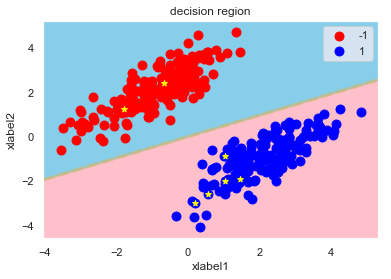

In [521]:
decision_region(X_train, y_train, SVMC, step=0.01, 
                title='decision region', 
                xlabel='xlabel1', ylabel='xlabel2', 
                target_names=['-1', '1'])

In [377]:
# print(SVMC.sv.shape)
print("lam",SVMC.lam.shape)
# print("test",X_test.shape)
# print("y",SVMC.y.shape)
# print(karnel(X_test,SVMC.sv).shape)
print((SVMC.y * karnel(X_test,SVMC.sv)).shape)

y_pred = np.dot((SVMC.y * karnel(X_test,SVMC.sv)) , SVMC.lam)
print(y_pred)

lam (3, 1)
(125, 3)
[[ 22.44542618]
 [-15.79101489]
 [-23.86713469]
 [-12.42630277]
 [-20.08298911]
 [ 13.03484336]
 [ 22.91441699]
 [ 10.64566731]
 [-20.96478354]
 [ 13.89361519]
 [-15.16817179]
 [ 17.43832816]
 [ 21.39690577]
 [-15.37304227]
 [ 14.41531454]
 [ 11.12664347]
 [-17.68238908]
 [ 12.84449328]
 [-22.13149979]
 [ 15.57845382]
 [ 12.77275211]
 [-17.62704364]
 [ 19.71030009]
 [ 18.3744603 ]
 [-15.51818425]
 [-14.85791128]
 [ 16.28160294]
 [ 14.57659628]
 [ -8.66365925]
 [-13.45403958]
 [ 12.73920255]
 [ 16.90289944]
 [-19.98492675]
 [-20.00670213]
 [ -6.71007779]
 [ 19.66246073]
 [-14.41212889]
 [ 15.26826327]
 [-17.70305744]
 [-14.54048066]
 [-17.69194833]
 [-12.97575842]
 [ 20.75707526]
 [-17.50381207]
 [ 15.30765299]
 [ 14.07419472]
 [-23.11765386]
 [ 16.76033849]
 [-21.06978994]
 [ 20.81725641]
 [ 16.19713792]
 [ 13.2332934 ]
 [-11.64730996]
 [  9.23751382]
 [-10.9049757 ]
 [-16.93241002]
 [ 19.52868592]
 [-17.51926627]
 [  7.49041619]
 [-19.59667561]
 [ 11.31389614]
 [ 1

In [146]:
def karnel(X):
    return np.dot(X, X.T) #shape() ->数値

lam = np.random.rand(X.shape[0],1)#lam 初期値
def _sigma(X, y): #jが1-n番目の数字をそれぞれとる時の値の総和
    return np.dot(karnel(y) * karnel(X), lam) 
#for文でi,jで回しても良い

def _lag(X, y):
    return 1 - _sigma(X, y)

lr = 1
def _gradient_ascent(X, y): 
    lam = np.random.rand(1,X.shape[1])
    lam = lam + lr * _lag(X,y)
    for i in range(lam.shape[0]):
        #lam[lam>0.0001]
        sv = lam[lam >0.00000001]: 
            #更新毎にλi>=0を満たす必要があります。満たさない場合は λi=0
            #この条件に当てはるラムダのインデックスに対応するxがサポートベクトル
    return lam




# def _pred(X):   

In [240]:
lam = np.random.rand(X.shape[0],1)
print(lam.shape)

(500, 1)
